## Machine Learning - XGboost

#### Importación de librerías

In [189]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV as GridSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve,roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### Importación de features

In [190]:
features = pd.read_csv('../features/user_type_events_lagged.csv')
features_all = pd.read_csv('../features/features_todos.csv')
features = pd.merge(features_all, features, how='inner', on='person')
features.shape

(38829, 167)

In [191]:
pd.set_option('display.max_rows', 100)
features.dtypes

person                                    object
marca_favorita_apple                       int64
marca_favorita_asus                        int64
marca_favorita_lenovo                      int64
marca_favorita_lg                          int64
marca_favorita_motorola                    int64
marca_favorita_no_tiene                    int64
marca_favorita_quantum                     int64
marca_favorita_samsung                     int64
marca_favorita_sony                        int64
nivel_de_actividad_muy_bajo                int64
nivel_de_actividad_bajo                    int64
nivel_de_actividad_medio                   int64
nivel_de_actividad_alto                    int64
nivel_de_actividad_muy_alto                int64
dias_en_plataforma                       float64
dias_distintos_con_eventos                 int64
eventos_totales_generados                  int64
cant_accesos_southeast                     int64
cant_accesos_northeast                     int64
cant_accesos_south  

#### Categorización de features categóricos

In [192]:
# Según Marca
features['marca_favorita_apple'] = features['marca_favorita_apple'].astype('category')
features['marca_favorita_asus'] = features['marca_favorita_asus'].astype('category')
features['marca_favorita_lenovo'] = features['marca_favorita_lenovo'].astype('category')
features['marca_favorita_lg'] = features['marca_favorita_lg'].astype('category')
features['marca_favorita_motorola'] = features['marca_favorita_motorola'].astype('category')
features['marca_favorita_no_tiene'] = features['marca_favorita_no_tiene'].astype('category')
features['marca_favorita_quantum'] = features['marca_favorita_quantum'].astype('category')
features['marca_favorita_samsung'] = features['marca_favorita_samsung'].astype('category')
features['marca_favorita_sony'] = features['marca_favorita_sony'].astype('category')

features['cant_modelo_iphone'] = features['cant_modelo_iphone'].astype('category')
features['cant_modelo_samsung'] = features['cant_modelo_samsung'].astype('category')
features['cant_modelo_motorola'] = features['cant_modelo_motorola'].astype('category')
features['cant_modelo_otro'] = features['cant_modelo_otro'].astype('category')
features['modelo_moda'] = features['modelo_moda'].astype('category')

features['porcentaje_modelo_iphone'] = features['porcentaje_modelo_iphone'].astype('category')
features['porcentaje_modelo_samsung'] = features['porcentaje_modelo_samsung'].astype('category')
features['porcentaje_modelo_motorola'] = features['porcentaje_modelo_motorola'].astype('category')
features['porcentaje_modelo_otro'] = features['porcentaje_modelo_otro'].astype('category')

# Nivel de Actividad
features['nivel_de_actividad_muy_bajo'] = features['nivel_de_actividad_muy_bajo'].astype('category')
features['nivel_de_actividad_bajo'] = features['nivel_de_actividad_bajo'].astype('category')
features['nivel_de_actividad_medio'] = features['nivel_de_actividad_medio'].astype('category')
features['nivel_de_actividad_alto'] = features['nivel_de_actividad_alto'].astype('category')
features['nivel_de_actividad_muy_alto'] = features['nivel_de_actividad_muy_alto'].astype('category')
features['has_converted_before'] = features['has_converted_before'].astype('category')
features['month_moda'] = features['month_moda'].astype('category')
features['completa_flujo'] = features['completa_flujo'].astype('category')
# No es Categorico: features['dias_en_plataforma'] = features['dias_en_plataforma'].astype('category')
# No es Categorico: features['dias_distintos_con_eventos'] = features['dias_distintos_con_eventos'].astype('category')
# No es Categorico: features['eventos_totales_generados'] = features['eventos_totales_generados'].astype('category')
# No es Categorico: features['first_and_last_event_distance_in_days'] = features['first_and_last_event_distance_in_days'].astype('category')
# No es Categorico: features['mean_events_per_day'] = features['mean_events_per_day'].astype('category')
# No es Categorico: features['most_viewed_sku'] = features['most_viewed_sku'].astype('category')
# No es Categorico: features['most_viewed_color_Preto'] = features['most_viewed_color_Preto'].astype('category')
# No es Categorico: features['most_viewed_color_Branco'] = features['most_viewed_color_Branco'].astype('category')
# No es Categorico: features['most_viewed_color_Dourado'] = features['most_viewed_color_Dourado'].astype('category')
# No es Categorico: features['most_viewed_sky'] = features['most_viewed_sky'].astype('category')
# No es Categorico: features['cantidad_checkouts'] = features['cantidad_checkouts'].astype('category')
# No es Categorico: features['tasa_cc'] = features['tasa_cc'].astype('category')


# Según Dispositivo
features['favorite_device_computer'] = features['favorite_device_computer'].astype('category')
features['favorite_device_smartphone'] = features['favorite_device_smartphone'].astype('category')
features['favorite_device_tablet'] = features['favorite_device_tablet'].astype('category')
features['favorite_device_unknown'] = features['favorite_device_unknown'].astype('category')


# Accesos Según Región
# No es Categorico: features['cant_accesos_southeast'] = features['cant_accesos_southeast'].astype('category')
# No es Categorico: features['cant_accesos_northeast'] = features['cant_accesos_northeast'].astype('category')
# No es Categorico: features['cant_accesos_south'] = features['cant_accesos_south'].astype('category')
# No es Categorico: features['cant_accesos_center_west'] = features['cant_accesos_center_west'].astype('category')
# No es Categorico: features['cant_accesos_north'] = features['cant_accesos_north'].astype('category')

# Eventos Según Franja Horaria
# No es Categorico: features['cant_ev_madrugada'] = features['cant_ev_madrugada'].astype('category')
# No es Categorico: features['cant_ev_manana'] = features['cant_ev_manana'].astype('category')
# No es Categorico: features['cant_ev_tarde'] = features['cant_ev_tarde'].astype('category')
# No es Categorico: features['cant_ev_noche'] = features['cant_ev_noche'].astype('category')
features['franja_horaria_moda'] = features['franja_horaria_moda'].astype('category')

# Según Estado del Celular
# No es Categorico: features['cant_buenos'] = features['cant_buenos'].astype('category')
# No es Categorico: features['cant_excelentes'] = features['cant_excelentes'].astype('category')
# No es Categorico: features['cant_muy_buenos'] = features['cant_muy_buenos'].astype('category')
# No es Categorico: features['cant_nuevos'] = features['cant_nuevos'].astype('category')
features['condicion_de_producto_moda'] = features['condicion_de_producto_moda'].astype('category')

# Según Semana del Mes
# No es Categorico: features['cant_ev_primer_semana_mes'] = features['cant_ev_primer_semana_mes'].astype('category')
# No es Categorico: features['cant_ev_segunda_semana_mes'] = features['cant_ev_segunda_semana_mes'].astype('category')
# No es Categorico: features['cant_ev_tercera_semana_mes'] = features['cant_ev_tercera_semana_mes'].astype('category')
# No es Categorico: features['cant_ev_cuarta_semana_mes'] = features['cant_ev_cuarta_semana_mes'].astype('category')
features['semana_del_mes_moda'] = features['semana_del_mes_moda'].astype('category')
# No es Categorico: features['porcentaje_eventos_en_fin_de_semana'] = features['porcentaje_eventos_en_fin_de_semana'].astype('category')

# Interes En Los Últimos Días
# No es Categorico: features['interest_last_2_days'] = features['interest_last_2_days'].astype('category')
# No es Categorico: features['interest_last_4_days'] = features['interest_last_4_days'].astype('category')
# No es Categorico: features['interest_last_6_days'] = features['interest_last_6_days'].astype('category')
# No es Categorico: features['interest_last_8_days'] = features['interest_last_8_days'].astype('category')
# No es Categorico: features['interest_last_10_days'] = features['interest_last_10_days'].astype('category')
# No es Categorico: features['interest_last_12_days'] = features['interest_last_12_days'].astype('category')
# No es Categorico: features['interest_last_14_days'] = features['interest_last_14_days'].astype('category')
# No es Categorico: features['interest_last_16_days'] = features['interest_last_16_days'].astype('category')
# No es Categorico: features['interest_last_18_days'] = features['interest_last_18_days'].astype('category')
# No es Categorico: features['interest_last_20_days'] = features['interest_last_20_days'].astype('category')
# No es Categorico: features['interest_last_22_days'] = features['interest_last_22_days'].astype('category')
# No es Categorico: features['interest_last_24_days'] = features['interest_last_24_days'].astype('category')
# No es Categorico: features['interest_last_26_days'] = features['interest_last_26_days'].astype('category')
# No es Categorico: features['interest_last_28_days'] = features['interest_last_28_days'].astype('category')
# No es Categorico: features['interest_last_30_days'] = features['interest_last_30_days'].astype('category')

# Cantidad Total de Eventos

# No es Categorico: features['ad_campaign_hit'] = features['ad_campaign_hit'].astype('category')
# No es Categorico: features['brand_listing'] = features['brand_listing'].astype('category')
# No es Categorico: features['checkout'] = features['checkout'].astype('category')
# No es Categorico: features['conversion'] = features['conversion'].astype('category')
# No es Categorico: features['generic_listing'] = features['generic_listing'].astype('category')
# No es Categorico: features['lead'] = features['lead'].astype('category')
# No es Categorico: features['search_engine_hit'] = features['search_engine_hit'].astype('category')
# No es Categorico: features['searched_products'] = features['searched_products'].astype('category')
# No es Categorico: features['staticpage_ev'] = features['staticpage_ev'].astype('category')
# No es Categorico: features['viewed_product'] = features['viewed_product'].astype('category')
# No es Categorico: features['visited_site'] = features['visited_site'].astype('category')
# No es Categorico: features['cant_total_eventos'] = features['cant_total_eventos'].astype('category')

In [193]:
features.head()

,person,marca_favorita_apple,marca_favorita_asus,marca_favorita_lenovo,marca_favorita_lg,marca_favorita_motorola,marca_favorita_no_tiene,marca_favorita_quantum,marca_favorita_samsung,marca_favorita_sony,...,cant_viewed_product_last_28_days,cant_searched_products_last_28_days,cant_checkout_last_28_days,cant_conversion_last_28_days,cant_visited_site_last_28_days,cant_viewed_product_last_30_days,cant_searched_products_last_30_days,cant_checkout_last_30_days,cant_conversion_last_30_days,cant_visited_site_last_30_days
0,0008ed71,1,0,0,0,0,0,0,0,0,...,0,0,3,0,2,0,0,3,0,2
1,00091926,1,0,0,0,0,0,0,0,0,...,366,0,2,0,33,372,0,2,0,34
2,00091a7a,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000ba417,0,0,0,0,0,0,0,1,0,...,153,0,6,1,6,153,0,6,1,6
4,000c79fe,1,0,0,0,0,0,0,0,0,...,3,9,1,0,1,3,9,1,0,1


In [194]:
features.shape

(38829, 167)

Obtengo el **nombre de las columnas** de los features

In [195]:
for column in features.columns:
    print ("'" + column + "'" + ",")


'person',
'marca_favorita_apple',
'marca_favorita_asus',
'marca_favorita_lenovo',
'marca_favorita_lg',
'marca_favorita_motorola',
'marca_favorita_no_tiene',
'marca_favorita_quantum',
'marca_favorita_samsung',
'marca_favorita_sony',
'nivel_de_actividad_muy_bajo',
'nivel_de_actividad_bajo',
'nivel_de_actividad_medio',
'nivel_de_actividad_alto',
'nivel_de_actividad_muy_alto',
'dias_en_plataforma',
'dias_distintos_con_eventos',
'eventos_totales_generados',
'cant_accesos_southeast',
'cant_accesos_northeast',
'cant_accesos_south',
'cant_accesos_center_west',
'cant_accesos_north',
'cant_total_eventos',
'first_and_last_event_distance_in_days',
'mean_events_per_day',
'cant_ev_madrugada',
'cant_ev_manana',
'cant_ev_tarde',
'cant_ev_noche',
'franja_horaria_moda',
'cant_buenos',
'cant_excelentes',
'cant_muy_buenos',
'cant_nuevos',
'condicion_de_producto_moda',
'cant_ev_primer_semana_mes',
'cant_ev_segunda_semana_mes',
'cant_ev_tercera_semana_mes',
'cant_ev_cuarta_semana_mes',
'semana_del_mes_moda'

In [196]:
features_names = ['cant_total_eventos',
                  'mean_events_per_day',
                  'favorite_device_computer',
                  'checkout',
                  'conversion',
                  'tasa_cc',
                  'most_viewed_sku',
                  'month_moda',
                  'viewed_product',
                  'dias_en_plataforma',
                  'ad_campaign_hit',
                  'brand_listing', #HASTA ACA MEJOR SUBMIT
                  'search_engine_hit',
                  'searched_products',
                  
'cant_viewed_product_last_2_days',
'cant_searched_products_last_2_days',
'cant_checkout_last_2_days',
'cant_conversion_last_2_days',
'cant_visited_site_last_2_days',
'cant_viewed_product_last_4_days',
'cant_searched_products_last_4_days',
'cant_checkout_last_4_days',
'cant_conversion_last_4_days',
'cant_visited_site_last_4_days',
'cant_viewed_product_last_6_days',
'cant_searched_products_last_6_days',
'cant_checkout_last_6_days',
'cant_conversion_last_6_days',
'cant_visited_site_last_6_days',
'cant_viewed_product_last_8_days',
'cant_searched_products_last_8_days',
'cant_checkout_last_8_days',
'cant_conversion_last_8_days',
'cant_visited_site_last_8_days',
'cant_viewed_product_last_10_days',
'cant_searched_products_last_10_days',
'cant_checkout_last_10_days',
'cant_conversion_last_10_days',
'cant_visited_site_last_10_days',
'cant_viewed_product_last_12_days',
'cant_searched_products_last_12_days',
'cant_checkout_last_12_days',
'cant_conversion_last_12_days',
'cant_visited_site_last_12_days',
'cant_viewed_product_last_14_days',
'cant_searched_products_last_14_days',
'cant_checkout_last_14_days',
'cant_conversion_last_14_days',
'cant_visited_site_last_14_days',
'cant_viewed_product_last_16_days',
'cant_searched_products_last_16_days',
'cant_checkout_last_16_days',
'cant_conversion_last_16_days',
'cant_visited_site_last_16_days',
'cant_viewed_product_last_18_days',
'cant_searched_products_last_18_days',
'cant_checkout_last_18_days',
'cant_conversion_last_18_days',
'cant_visited_site_last_18_days',
'cant_viewed_product_last_20_days',
'cant_searched_products_last_20_days',
'cant_checkout_last_20_days',
'cant_conversion_last_20_days',
'cant_visited_site_last_20_days',
'cant_viewed_product_last_22_days',
'cant_searched_products_last_22_days',
'cant_checkout_last_22_days',
'cant_conversion_last_22_days',
'cant_visited_site_last_22_days',
'cant_viewed_product_last_24_days',
'cant_searched_products_last_24_days',
'cant_checkout_last_24_days',
'cant_conversion_last_24_days',
'cant_visited_site_last_24_days',
'cant_viewed_product_last_26_days',
'cant_searched_products_last_26_days',
'cant_checkout_last_26_days',
'cant_conversion_last_26_days',
'cant_visited_site_last_26_days',
'cant_viewed_product_last_28_days',
'cant_searched_products_last_28_days',
'cant_checkout_last_28_days',
'cant_conversion_last_28_days',
'cant_visited_site_last_28_days',
'cant_viewed_product_last_30_days',
'cant_searched_products_last_30_days',
'cant_checkout_last_30_days',
'cant_conversion_last_30_days',
'cant_visited_site_last_30_days'
]

### Creación del Training Set

In [197]:
labels_training_set = pd.read_csv('../dataset/labels_training_set.csv')
test_set = pd.read_csv('../dataset/trocafone_kaggle_test.csv')
test_set.shape

(19415, 1)

En **labels_training_set** están los usuarios con los labels, los resultados que conocemos de compras (1) o no (0) en los primeros 15 días de Junio.

En **test_set** están solamente las personas que queremos predecir si compraron o no.

Realizamos un merge entre el modelo con los **features** y **labels_training_set** para generar un modelo completo con los labels, con el fin de entrenar los algoritmos. Este modelo se guarda en **training_set**.

In [198]:
training_set_global = pd.merge(features, labels_training_set, how='inner', on='person')
training_set_global.head()

,person,marca_favorita_apple,marca_favorita_asus,marca_favorita_lenovo,marca_favorita_lg,marca_favorita_motorola,marca_favorita_no_tiene,marca_favorita_quantum,marca_favorita_samsung,marca_favorita_sony,...,cant_searched_products_last_28_days,cant_checkout_last_28_days,cant_conversion_last_28_days,cant_visited_site_last_28_days,cant_viewed_product_last_30_days,cant_searched_products_last_30_days,cant_checkout_last_30_days,cant_conversion_last_30_days,cant_visited_site_last_30_days,label
0,0008ed71,1,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,3,0,2,0
1,000c79fe,1,0,0,0,0,0,0,0,0,...,9,1,0,1,3,9,1,0,1,0
2,001802e4,1,0,0,0,0,0,0,0,0,...,4,1,0,1,4,4,1,0,1,0
3,0019e639,0,0,0,0,1,0,0,0,0,...,1,4,1,9,123,1,4,1,12,0
4,001b0bf9,0,0,0,0,0,0,0,1,0,...,0,2,1,0,2,0,2,1,0,0


In [199]:
training_set_global.shape

(19414, 168)

Merge de **test_set**, que son las personas que queremos predecir si compraron o no con el resto del modelo con features.

In [200]:
test_set = pd.merge(features, test_set, how='inner', on='person')

Teniendo el **training_set_global** completo, lo dividimos en dos partes:
1. Un training set propiamente dicho.
2. Un test set.

Esto se hace con la función train_test_split, que recibe:

1. x - Arreglo con todas las columnas del training_set original menos la última (que es el label)

2. y - Arreglo con la última columna del training_set original (que es el label)

3. % del tamaño del test set sobre el total del tamaño del training_set original

De yapa:

z - arreglo con todas las columnas del test_set original. Este data frame tiene las predicciones que tenemos que hacer y comparar en Kaggle para obtener el resultado.

In [201]:
x = np.array(training_set_global[features_names])
y = np.array(training_set_global['label'])
z = np.array(test_set[features_names])
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
z.shape

(19415, 89)

### XGBoost + RandomSearch

Defino una función **model_fit()** que recibe el algoritmo clasificador y realiza estas tareas:

1. Fitting: Entrena el algoritmo con el training set X (person + features) e Y (labels)
2. Predicción: Predice los labels en el set de testing
3. Cálculo de accuracy: Calcula el accuracy de la predicción anterior comparando con los labels conocidos (y_test)

La predicción del punto 2 retorna una probabilidad [0, 1] por eso:

4. Clasificación: etiqueta con 0 o 1 dependiendo de la probabilidad.


In [202]:
def modelfit(alg):
    alg.fit(X_train, y_train, eval_metric='aucpr')
    pred = (alg.predict_proba(X_test)[:,1])
    accuracy = accuracy_score(y_test, pred.round(), normalize=False)
    pred_proba = pred
    print("Accuracy: ", accuracy / float(pred.size))

    for i in range(0,pred.size):
        if (pred[i] >= 0.5):
            pred[i] = 1
        else: 
            pred[i] = 0

    print('---Classification Report---')
    print(classification_report(y_test,pred))
    print('AUROC :' + str(roc_auc_score(y_test, pred_proba)))

Defino función Timer que servirá para tomar los tiempos de ejecución de los algoritmos

In [203]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

#### Random Search

Buscaremos los mejores hiperparámetros para XGBoost utilizando la técnica de Random Search, a modo de tener una primera aproximación.

In [204]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 3, 5, 7, 8, 9, 10, 11, 12, 13],
        'gamma': [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10],
        'subsample': [0.5, 0.55, 0.58, 0.6, 0.62, 0.63, 0.65, 0.7, 1],
        'colsample_bytree': [0.7, 0.75, 0.78, 0.8, 0.83, 0.85, 0.9, 1.0],
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 9, 10],
        'n_estimators': [650, 675, 700, 725, 750],
        'learning_rate': [0.01, 0.02, 0.03, 0.05],
        'scale_pos_weight' : [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
        }

param_test = {
    'n_estimators': [500, 800, 1000, 1500, 2000],
    'max_depth':range(1,5),
    'min_child_weight':range(3,9),
    'gamma':[i/10.0 for i in range(1,9)],
    'subsample':[i/10.0 for i in range(1,10)],
    'colsample_bytree':[i/10.0 for i in range(5,9)],
    'learning_rate':[0.001, 0.01, 0.1, 0.2],
    'scale_pos_weight' : [10, 15, 18]
}


# Best hyperparameters:
#{'subsample': 0.7, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 0.5, 'colsample_bytree': 1.0}

# Best hyperparameters:
#{'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 8, 'colsample_bytree': 0.8}


In [205]:
xgb1 = xgb.XGBClassifier(objective='binary:logistic')

In [206]:
folds = 4
param_comb = 400

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb1, param_distributions=param_test, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 4 folds for each of 400 candidates, totalling 1600 fits
[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=2000, subsample=0.3, max_depth=4, gamma=0.3 
[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=2000, subsample=0.3, max_depth=4, gamma=0.3 
[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=2000, subsample=0.3, max_depth=4, gamma=0.3 
[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=2000, subsample=0.3, max_depth=4, gamma=0.3 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=2000, subsample=0.5, max_depth=1, gamma=0.5 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=2000, subsample=0.5, max_depth=1, gamma=0.5 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_r

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.4min


[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.6, score=0.834252115977, total=  14.7s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=3, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.6, score=0.857096821283, total=  15.1s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=3, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.6, score=0.863674047225, total=  15.0s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=3, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.7 
[CV]  colsample_

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=2000, subsample=0.7, max_depth=3, gamma=0.4, score=0.809710772824, total=  44.6s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=7, n_estimators=1000, subsample=0.6, max_depth=4, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=2000, subsample=0.7, max_depth=3, gamma=0.4, score=0.810057812384, total=  45.2s
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=2000, subsample=0.7, max_depth=3, gamma=0.4, score=0.791329852614, total=  45.0s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=7, n_estimators=1000, subsample=0.6, max_depth=4, gamma=0.3 
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=7, n_estimators=1000, subsample=0.6, max_depth=4, gamma=0.3 
[CV]  colsample_

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.6 
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=3, n_estimators=1500, subsample=0.2, max_depth=1, gamma=0.5, score=0.868585768545, total=  13.9s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.6, score=0.831888253262, total=   9.4s
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.6, score=0.849871650449, total=   9.4s
[CV] col

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.2, max_depth=4, gamma=0.8 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=8, n_estimators=2000, subsample=0.4, max_depth=4, gamma=0.1, score=0.860140303136, total= 1.2min
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=8, n_estimators=2000, subsample=0.4, max_depth=4, gamma=0.1, score=0.85060497809, total= 1.3min
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=8, n_estimators=2000, subsample=0.4, max_depth=4, gamma=0.1, score=0.85504625817, total= 1.3min
[CV] colsample_b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.8min


[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.1, max_depth=2, gamma=0.2, score=0.855537897546, total=  12.4s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.3, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.1, max_depth=2, gamma=0.2, score=0.861982917942, total=  12.4s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.3, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.1, max_depth=2, gamma=0.2, score=0.873206617989, total=  12.3s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.3, max_depth=3, gamma=0.5 
[CV]  colsample_

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=3, n_estimators=800, subsample=0.2, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.1, max_depth=4, gamma=0.6, score=0.877419292645, total=  21.8s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=3, n_estimators=800, subsample=0.2, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.1, max_depth=4, gamma=0.6, score=0.865750993832, total=  23.3s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=3, n_estimators=800, subsample=0.2, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.2, min_child_weight=7, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.4, score=0.811060371112, total=  52.0s
[CV] colsample_byt

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=500, subsample=0.1, max_depth=3, gamma=0.1, score=0.834749797912, total=   7.7s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1000, subsample=0.3, max_depth=4, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1000, subsample=0.3, max_depth=4, gamma=0.5, score=0.794529169226, total=  25.0s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1000, subsample=0.3, max_depth=4, gamma=0.5, score=0.803045409851, total=  25.1s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.3 
[CV]  colsample_bytree

[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=500, subsample=0.1, max_depth=2, gamma=0.8 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.2, score=0.8022606221, total=  40.9s
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.2, score=0.814361378353, total=  41.7s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=500, subsample=0.1, max_depth=2, gamma=0.8 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.2, score=0.813248648336, total=  41.2s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=500, subsample=0.1, max_depth=2, gamma=0.8 
[CV] colsample_byt

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.8, max_depth=3, gamma=0.5, score=0.871047260729, total=  20.5s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.8, max_depth=3, gamma=0.5, score=0.864542615744, total=  20.7s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=1500, subsample=0.5, max_depth=4, gamma=0.8, score=0.853194691947, total=  46.8s
[CV] colsample_by

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=800, subsample=0.2, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.7, score=0.880844931157, total=  11.8s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=800, subsample=0.2, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.1, score=0.842154840238, total=   9.2s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=8, n_estimators=800, subsample=0.9, max_depth=4, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.7, score=0.867874306532, total=  12.1s
[CV] colsample_by

[CV]  colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.4, score=0.864428720553, total=  26.2s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=4, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.1, max_depth=2, gamma=0.8, score=0.868879212021, total=  11.3s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=4, gamma=0.6 
[CV]  colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.4, score=0.872183402144, total=  26.4s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=4, gamma=0.6 
[CV]  colsample_bytre

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 12.8min


[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=2000, subsample=0.1, max_depth=2, gamma=0.3, score=0.806816022211, total=  27.3s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.2, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=2000, subsample=0.1, max_depth=2, gamma=0.3, score=0.828388937701, total=  27.3s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.2, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=2000, subsample=0.1, max_depth=2, gamma=0.3, score=0.815728570321, total=  27.5s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.2, max_depth=3, gamma=0.4 
[CV]  colsample_byt

[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=3, n_estimators=1000, subsample=0.2, max_depth=3, gamma=0.7 
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=3, n_estimators=1000, subsample=0.2, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6, score=0.832207749999, total=  23.9s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=3, n_estimators=1000, subsample=0.2, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6, score=0.828761889997, total=  24.0s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=3, n_estimators=1000, subsample=0.2, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.8, scale_pos_weight=15, lea

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=4, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.2, max_depth=2, gamma=0.1, score=0.867520651777, total=  11.0s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=4, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=1500, subsample=0.2, max_depth=3, gamma=0.4, score=0.819926405579, total=  31.6s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=7, n_estimators=2000, subsample=0.4, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=1500, subsample=0.2, max_depth=3, gamma=0.4, score=0.816836100928, total=  31.7s
[CV] colsample_bytr

[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=3, n_estimators=500, subsample=0.1, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=3, n_estimators=500, subsample=0.1, max_depth=1, gamma=0.2, score=0.840955350331, total=   3.4s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=3, n_estimators=500, subsample=0.9, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=3, n_estimators=500, subsample=0.1, max_depth=1, gamma=0.2, score=0.842560408295, total=   3.4s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=3, n_estimators=500, subsample=0.9, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=3, n_estimators=500, subsample=0.1, max_depth=1, gamma=0.2, score=0.866753334747, total=   3.3s
[CV] colsample_bytree=0

[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.8, max_depth=4, gamma=0.8, score=0.823764497853, total=  41.2s
[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.2, min_child_weight=7, n_estimators=2000, subsample=0.1, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.8, max_depth=4, gamma=0.8, score=0.826069832071, total=  41.7s
[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.2, min_child_weight=7, n_estimators=2000, subsample=0.1, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.8, max_depth=4, gamma=0.8, score=0.814666913971, total=  41.8s
[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.2, min_child_weight=7, n_estimators=2000, subsample=0.1, max_depth=3, gamma=0.7 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.4, score=0.871142283465, total=  33.0s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1500, subsample=0.1, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.4, score=0.865489386205, total=  32.8s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1500, subsample=0.1, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=3, n_estimators=2000, subsample=0.4, max_depth=3, gamma=0.5, score=0.851407851357, total=  57.8s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=3, n_estimators=1000, subsample=0.1, max_depth=4, gamma=0.7 
[CV]  colsamp

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=7, n_estimators=1500, subsample=0.2, max_depth=3, gamma=0.4, score=0.815105034552, total=  25.3s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.2, score=0.832425338295, total=  34.6s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.2, score=0.832658075142, total=  35.3s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.2 
[CV]  colsample_b

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=7, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.5, score=0.854095342233, total=   5.8s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=7, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.5, score=0.869699039582, total=   5.8s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=7, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.5, score=0.865027766397, total=   5.7s
[CV] colsample_bytree=0.7

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.9, max_depth=3, gamma=0.8, score=0.872040179469, total=  24.1s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.2, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.9, max_depth=3, gamma=0.8, score=0.866849330617, total=  24.6s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.2, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.2, max_depth=1, gamma=0.7, score=0.845595627302, total=   4.6s
[CV] colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.1, max_depth=4, gamma=0.3 
[CV]  colsample

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 24.9min


[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=8, n_estimators=800, subsample=0.3, max_depth=4, gamma=0.2, score=0.796391064007, total=  26.0s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.1, max_depth=4, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=8, n_estimators=800, subsample=0.3, max_depth=4, gamma=0.2, score=0.809571681572, total=  26.7s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.1, max_depth=4, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=8, n_estimators=800, subsample=0.3, max_depth=4, gamma=0.2, score=0.798538026997, total=  26.0s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.1, max_depth=4, gamma=0.4 
[CV]  colsample_byt

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.4, score=0.809436721743, total=  16.5s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.4, score=0.799998892666, total=  16.3s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.7, score=0.831899270391, total=  35.1s
[CV] colsample_bytree

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.2, max_depth=3, gamma=0.3, score=0.854671675788, total=  16.4s
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.4, score=0.866152402361, total=  11.4s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=500, subsample=0.4, max_depth=1, gamma=0.3 
[CV] colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.1, min_child_weight=7, n_estimators=1500, subsample=0.5, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.2, max_depth=3, gamma=0.3, score=0.863252642045, total=  16.7s
[CV] colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.1, min_child_weight=7, n_estimators=1500, subsample=0.5, max_depth=4, gamma=0.1 
[CV]  colsample_b

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.3, score=0.847637238997, total=   9.2s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.3, max_depth=4, gamma=0.3 
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.3, max_depth=4, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.3, score=0.871002503643, total=   9.2s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.3, max_depth=4, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.3, score=0.861797811908, total=   9.0s
[CV] colsample_b

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.8, max_depth=4, gamma=0.6, score=0.817437911593, total=  19.4s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=3, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.1 
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=3, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.8, max_depth=4, gamma=0.6, score=0.804775654157, total=  19.0s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=3, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=3, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.1, score=0.847569759083, total=  21.4s
[CV] colsampl

[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=8, n_estimators=800, subsample=0.1, max_depth=3, gamma=0.7 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=8, n_estimators=800, subsample=0.1, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=8, n_estimators=800, subsample=0.1, max_depth=3, gamma=0.7, score=0.848557169259, total=  10.7s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=8, n_estimators=800, subsample=0.1, max_depth=3, gamma=0.7, score=0.861458227179, total=  10.9s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, l

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=2000, subsample=0.5, max_depth=2, gamma=0.8, score=0.798960767161, total=  38.8s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.2, max_depth=2, gamma=0.7, score=0.860044763972, total=  16.9s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=2000, subsample=0.5, max_depth=2, gamma=0.8, score=0.790653894142, total=  40.0s
[CV] colsample_bytre

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=3, n_estimators=800, subsample=0.4, max_depth=4, gamma=0.2, score=0.86455507325, total=  28.1s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=8, n_estimators=500, subsample=0.8, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=3, n_estimators=800, subsample=0.4, max_depth=4, gamma=0.2, score=0.873676223108, total=  28.5s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=8, n_estimators=500, subsample=0.8, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.2, score=0.854969138268, total=  19.3s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.3 
[CV]  colsample_

[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.9, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.2, min_child_weight=8, n_estimators=500, subsample=0.2, max_depth=3, gamma=0.6, score=0.816058016201, total=  11.8s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=8, n_estimators=500, subsample=0.4, max_depth=4, gamma=0.8 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.2, min_child_weight=8, n_estimators=500, subsample=0.2, max_depth=3, gamma=0.6, score=0.791069790757, total=  12.1s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=8, n_estimators=500, subsample=0.4, max_depth=4, gamma=0.8 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.2, min_child_weight=8, n_estimators=500, subsample=0.2, max_depth=3, gamma=0.6, score=0.8042228655, total=  11.9s
[CV] colsample_bytree=0.6,

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.9, max_depth=2, gamma=0.2, score=0.836766087074, total=  11.7s
[CV] colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.9, max_depth=2, gamma=0.2, score=0.846961062712, total=  11.7s
[CV] colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.9, max_depth=2, gamma=0.2, score=0.836405262051, total=  11.5s
[CV] colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.

[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=8, n_estimators=2000, subsample=0.1, max_depth=2, gamma=0.6, score=0.78428737079, total=  24.3s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=2000, subsample=0.5, max_depth=1, gamma=0.6 
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=2000, subsample=0.5, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.8, max_depth=1, gamma=0.8, score=0.863662341525, total=   4.8s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=3, n_estimators=800, subsample=0.3, max_depth=4, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=8, n_estimators=2000, subsample=0.1, max_depth=2, gamma=0.6, score=0.774968302568, total=  25.1s
[CV] colsample_bytr

[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.2, min_child_weight=3, n_estimators=500, subsample=0.2, max_depth=4, gamma=0.2, score=0.790028672078, total=  15.6s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.3 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.2, min_child_weight=3, n_estimators=500, subsample=0.2, max_depth=4, gamma=0.2, score=0.800632658626, total=  15.6s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.3 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.2, min_child_weight=3, n_estimators=500, subsample=0.2, max_depth=4, gamma=0.2, score=0.806887893519, total=  15.6s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.3 
[CV]  colsample_bytree=0.

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 40.2min


[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.3, score=0.827977172509, total=  26.3s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.8 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.3, score=0.835643717069, total=  25.9s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.8 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.3, score=0.830734209011, total=  26.5s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.8 
[CV]  colsample_bytree=0.

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=3, n_estimators=1000, subsample=0.7, max_depth=4, gamma=0.3, score=0.80628169146, total=  34.9s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=3, n_estimators=1000, subsample=0.7, max_depth=4, gamma=0.3, score=0.806599811056, total=  35.7s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=3, n_estimators=1000, subsample=0.7, max_depth=4, gamma=0.3, score=0.805507878681, total=  35.1s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.3 
[CV]  colsample_b

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=2000, subsample=0.4, max_depth=2, gamma=0.3, score=0.817936317229, total=  42.8s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1, score=0.835033643557, total=   9.9s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=3, n_estimators=1000, subsample=0.9, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1, score=0.856753224576, total=   9.5s
[CV]  colsample_byt

[CV]  colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.001, min_child_weight=7, n_estimators=800, subsample=0.2, max_depth=2, gamma=0.6, score=0.846478374753, total=  13.2s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=8, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.001, min_child_weight=7, n_estimators=800, subsample=0.2, max_depth=2, gamma=0.6, score=0.863052268014, total=  13.5s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=8, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.001, min_child_weight=7, n_estimators=800, subsample=0.2, max_depth=2, gamma=0.6, score=0.872490504612, total=  13.3s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=8, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.3 
[CV]  colsample_

[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.6, score=0.764821481198, total=   5.8s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.6, score=0.750514910251, total=   5.7s
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.6, score=0.842130051698, total=   6.0s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.3 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.3 
[CV]  colsample_byt

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.8 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=3, n_estimators=500, subsample=0.8, max_depth=3, gamma=0.2, score=0.864907343838, total=  11.2s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.8 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=7, n_estimators=1000, subsample=0.7, max_depth=4, gamma=0.2, score=0.831256145492, total=  34.6s
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=7, n_estimators=1000, subsample=0.7, max_depth=4, gamma=0.2, score=0.831881367556, total=  34.9s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=8, n_estimators=1500, subsample=0.9, max_depth=4, gamma=0.7 
[CV]  colsample

[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.2, max_depth=1, gamma=0.8, score=0.83471414682, total=   4.4s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.2, max_depth=1, gamma=0.8, score=0.846695274478, total=   4.3s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.2, max_depth=1, gamma=0.8, score=0.844916696734, total=   4.4s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.5 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=7, n_estimators=800, subsample=0.9, max_depth=1, gamma=0.1, score=0.863490198887, total=   7.3s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=3, n_estimators=800, subsample=0.8, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=7, n_estimators=800, subsample=0.9, max_depth=1, gamma=0.1, score=0.8783557486, total=   7.3s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=3, n_estimators=800, subsample=0.8, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=7, n_estimators=800, subsample=0.9, max_depth=1, gamma=0.1, score=0.863375762676, total=   7.0s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=3, n_estimators=800, subsample=0.8, max_depth=1, gamma=0.5 
[CV]  colsample_bytre

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=2000, subsample=0.2, max_depth=4, gamma=0.1 
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=2000, subsample=0.2, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.2, score=0.810113003422, total=  40.1s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=2000, subsample=0.2, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=500, subsample=0.7, max_depth=4, gamma=0.1, score=0.852997760769, total=  18.2s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.8 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learn

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=7, n_estimators=800, subsample=0.1, max_depth=2, gamma=0.8 
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=7, n_estimators=800, subsample=0.1, max_depth=2, gamma=0.8 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.3, score=0.860763838905, total=  35.2s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=3, n_estimators=1000, subsample=0.8, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=4, gamma=0.3, score=0.821802071771, total=  40.9s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=3, n_estimators=1000, subsample=0.8, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.8, score=0.862986853811, total=  31.6s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.8, score=0.872416138992, total=  31.7s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.8, score=0.8546620358, total=  33.1s
[CV] colsample_

[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=4, gamma=0.7 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.001, min_child_weight=3, n_estimators=800, subsample=0.9, max_depth=1, gamma=0.4, score=0.754286766253, total=   9.8s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=4, gamma=0.7 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=4, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=4, gamma=0.7, score=0.811171230971, total=  24.3s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=2000, subsample=0.1, max_depth=4, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=2000, subsample=0.3, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=2000, subsample=0.4, max_depth=2, gamma=0.6, score=0.828281520694, total=  45.3s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.9, max_depth=4, gamma=0.6 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=2000, subsample=0.4, max_depth=2, gamma=0.6, score=0.815048571767, total=  45.5s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.9, max_depth=4, gamma=0.6 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=2000, subsample=0.4, max_depth=2, gamma=0.6, score=0.815909896243, total=  45.6s
[CV] colsample_

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.6, score=0.838442067805, total=  17.4s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=4, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.6, score=0.839458397944, total=  17.7s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=4, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.6, score=0.831509462168, total=  17.7s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=4, gamma=0.4 
[CV]  colsample_bytree

[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 58.5min


[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=500, subsample=0.4, max_depth=1, gamma=0.8, score=0.846111366647, total=   6.3s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=8, n_estimators=2000, subsample=0.9, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=500, subsample=0.4, max_depth=1, gamma=0.8, score=0.855002878225, total=   6.3s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=8, n_estimators=2000, subsample=0.9, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=8, n_estimators=500, subsample=0.4, max_depth=1, gamma=0.8, score=0.874165796773, total=   6.5s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=8, n_estimators=2000, subsample=0.9, max_depth=3, gamma=0.6 
[CV]  colsample_bytree

[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=2000, subsample=0.6, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.9, max_depth=2, gamma=0.6, score=0.853945430587, total=  11.5s
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.9, max_depth=2, gamma=0.6, score=0.871177400564, total=  12.0s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=2000, subsample=0.6, max_depth=3, gamma=0.2 
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=2000, subsample=0.6, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=2000, subsample=0.2, max_depth=4, gamma=0.6, score=0.801007241008, total= 1.0min
[CV] colsample_by

[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=3, n_estimators=1000, subsample=0.8, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.3, score=0.836823927001, total=  11.8s
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.3, score=0.830469952495, total=  11.8s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=3, n_estimators=1000, subsample=0.8, max_depth=1, gamma=0.5 
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=3, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=2000, subsample=0.1, max_depth=2, gamma=0.7, score=0.864149160908, total=  24.9s
[CV] colsample_b

[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.1, min_child_weight=3, n_estimators=2000, subsample=0.6, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=4, gamma=0.3, score=0.851118651724, total=  55.5s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.1, max_depth=3, gamma=0.8 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=4, gamma=0.3, score=0.856883364411, total=  55.8s
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=4, gamma=0.3, score=0.864993348408, total=  55.6s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.1, max_depth=3, gamma=0.8 
[CV] colsample

[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.1, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=8, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.4, score=0.824308468592, total=  13.4s
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=8, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.4, score=0.826459563006, total=  13.3s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.1, max_depth=1, gamma=0.1 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.1, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=8, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.4, score=0.815342387633, total=  13.3s
[CV] colsample_bytree=

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=2000, subsample=0.5, max_depth=4, gamma=0.2, score=0.823924246222, total= 1.4min
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=2000, subsample=0.5, max_depth=4, gamma=0.2, score=0.807878957334, total= 1.4min
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.4, score=0.820705867447, total=  38.3s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=7, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.6 
[CV]  colsample

[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=2000, subsample=0.6, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=2000, subsample=0.3, max_depth=2, gamma=0.3, score=0.8562498795, total=  36.0s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=500, subsample=0.1, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=2000, subsample=0.3, max_depth=2, gamma=0.3, score=0.860656731053, total=  36.3s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=500, subsample=0.1, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=2000, subsample=0.3, max_depth=2, gamma=0.3, score=0.875528477901, total=  35.5s
[CV] colsample_byt

[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=1000, subsample=0.2, max_depth=4, gamma=0.1 
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=1000, subsample=0.2, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=4, gamma=0.7, score=0.853233251898, total=  47.1s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=1000, subsample=0.2, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=4, gamma=0.7, score=0.866334420366, total=  47.0s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=1000, subsample=0.2, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=18,

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=3, n_estimators=2000, subsample=0.1, max_depth=2, gamma=0.8, score=0.743818308658, total=  22.4s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.2, score=0.853555502918, total=   8.0s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.9, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.2, score=0.86700535157, total=   8.1s
[CV] colsample_bytree

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.9, max_depth=2, gamma=0.4, score=0.81544931983, total=  21.5s
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.9, max_depth=2, gamma=0.4, score=0.813128837059, total=  21.3s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.2 
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.9, max_depth=2, gamma=0.4, score=0.801384577672, total=  21.3s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.2 
[CV]  colsample_b

[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.001, min_child_weight=7, n_estimators=500, subsample=0.5, max_depth=3, gamma=0.5, score=0.851373422829, total=  17.9s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.001, min_child_weight=7, n_estimators=500, subsample=0.5, max_depth=3, gamma=0.5, score=0.866178378334, total=  17.4s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.6 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=4, gamma=0.7, score=0.860631942513, total= 1.1min
[CV] colsa

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=8, n_estimators=1000, subsample=0.1, max_depth=2, gamma=0.6, score=0.816445569004, total=  12.6s
[CV] colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.1, min_child_weight=3, n_estimators=1500, subsample=0.2, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=1500, subsample=0.9, max_depth=1, gamma=0.1, score=0.83199773598, total=  17.8s
[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.8, max_depth=4, gamma=0.8 
[CV]  colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.001, min_child_weight=8, n_estimators=1500, subsample=0.9, max_depth=1, gamma=0.1, score=0.858455370988, total=  17.7s
[CV] colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.8, max_depth=4, gamma=0.8 
[CV]  colsample_

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.6, score=0.868615229528, total=  19.2s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.6, score=0.86257646576, total=  20.0s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.6, score=0.856769824045, total=  19.0s
[CV] colsam

[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=500, subsample=0.8, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=7, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.3, score=0.87451008205, total=  35.1s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=500, subsample=0.8, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=7, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.3, score=0.863725957013, total=  35.2s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=500, subsample=0.8, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=8, n_estimators=500, subsample=0.8, max_depth=1, gamma=0.4, score=0.845140482165, total=   5.6s
[CV] colsample_byt

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=8, n_estimators=800, subsample=0.4, max_depth=1, gamma=0.6, score=0.84488328701, total=   8.5s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.8, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=2000, subsample=0.6, max_depth=3, gamma=0.4, score=0.853673937054, total= 1.1min
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=2000, subsample=0.6, max_depth=3, gamma=0.4, score=0.867499745229, total= 1.1min
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.001, min_child_weight=7, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.7 
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.001, min_child_weight=7, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.7 
[CV]  colsampl

[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.8, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.4, score=0.823497332478, total=  16.5s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.8, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.4, score=0.833195160175, total=  17.2s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.8, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.9, max_depth=3, gamma=0.4, score=0.821784302435, total=  17.0s
[CV] colsample_bytree=

[CV] colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.01, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.01, min_child_weight=7, n_estimators=1000, subsample=0.5, max_depth=4, gamma=0.4, score=0.853861916815, total=  46.6s
[CV] colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.01, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.3, score=0.870450270057, total=  18.4s
[CV] colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.01, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.1 
[CV]  colsample_bytree=0.8, scale_pos_weight=18, learning_rate=0.01, min_child_weight=7, n_estimators=1000, subsample=0.5, max_depth=4, gamma=0.4, score=0.86060371112, total=  45.9s
[CV] colsample_b

[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 80.8min


[CV]  colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.01, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.1, score=0.855065538145, total=  33.9s
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.8, max_depth=3, gamma=0.8, score=0.851797582291, total=  22.8s
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.8 
[CV] colsample_bytree=0.8, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.8 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.8, max_depth=3, gamma=0.8, score=0.866365669525, total=  22.7s
[CV]  colsample_bytree=0.8, scale_pos_weight=15, learning_rate=0.01, min_child_weight=8, n_estimators=800, subsample=0.8, max_depth=4, gamma=0.1, score=0.86194573

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=800, subsample=0.7, max_depth=4, gamma=0.1, score=0.871936893886, total=  23.7s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1500, subsample=0.9, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=800, subsample=0.7, max_depth=4, gamma=0.1, score=0.863305170142, total=  23.9s
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=7, n_estimators=800, subsample=0.7, max_depth=4, gamma=0.1, score=0.86694269165, total=  24.3s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1500, subsample=0.9, max_depth=3, gamma=0.1 
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=7, n_estimators=1500, subsample=0.9, max_depth=3, gamma=0.1 
[CV]  colsample_b

[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 83.3min finished



 Time taken: 1 hours 23 minutes and 23.56 seconds.


In [207]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'param_scale_pos_weight': masked_array(data=[18, 18, 18, 10, 18, 10, 10, 18, 15, 15, 18, 10, 10, 10,
                   15, 18, 18, 10, 10, 18, 15, 10, 15, 10, 15, 18, 18, 18,
                   15, 18, 18, 10, 15, 15, 15, 10, 15, 10, 10, 15, 10, 15,
                   10, 18, 10, 15, 18, 15, 18, 18, 10, 18, 18, 18, 15, 10,
                   10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 10, 10, 10, 18,
                   15, 10, 10, 18, 15, 18, 10, 18, 18, 10, 10, 15, 10, 15,
                   18, 10, 15, 18, 15, 10, 15, 10, 10, 18, 10, 18, 15, 18,
                   15, 10, 18, 10, 15, 18, 18, 10, 15, 10, 18, 10, 15, 18,
                   18, 10, 15, 15, 10, 15, 18, 18, 15, 15, 18, 15, 15, 18,
                   18, 15, 18, 10, 18, 15, 10, 10, 10, 18, 15, 10, 10, 15,
                   18, 18, 18, 10, 10, 18, 15, 15, 10, 15, 15, 15, 18, 18,
                   10, 10, 10, 15, 15, 15, 15, 18, 15, 15, 15, 18, 10, 10,
                   10, 18, 15, 10, 18, 18, 15, 18, 18, 15,

In [208]:
random_search.best_score_

0.8675662489709633

In [209]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=6, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=10, seed=None, silent=True,
       subsample=0.4)

In [210]:
xgbf = random_search.best_estimator_

In [211]:
modelfit(xgbf)

('Accuracy: ', 0.8382693793458666)
---Classification Report---
             precision    recall  f1-score   support

          0       0.99      0.84      0.91      3690
          1       0.20      0.76      0.32       193

avg / total       0.95      0.84      0.88      3883

AUROC :0.7995120547060393


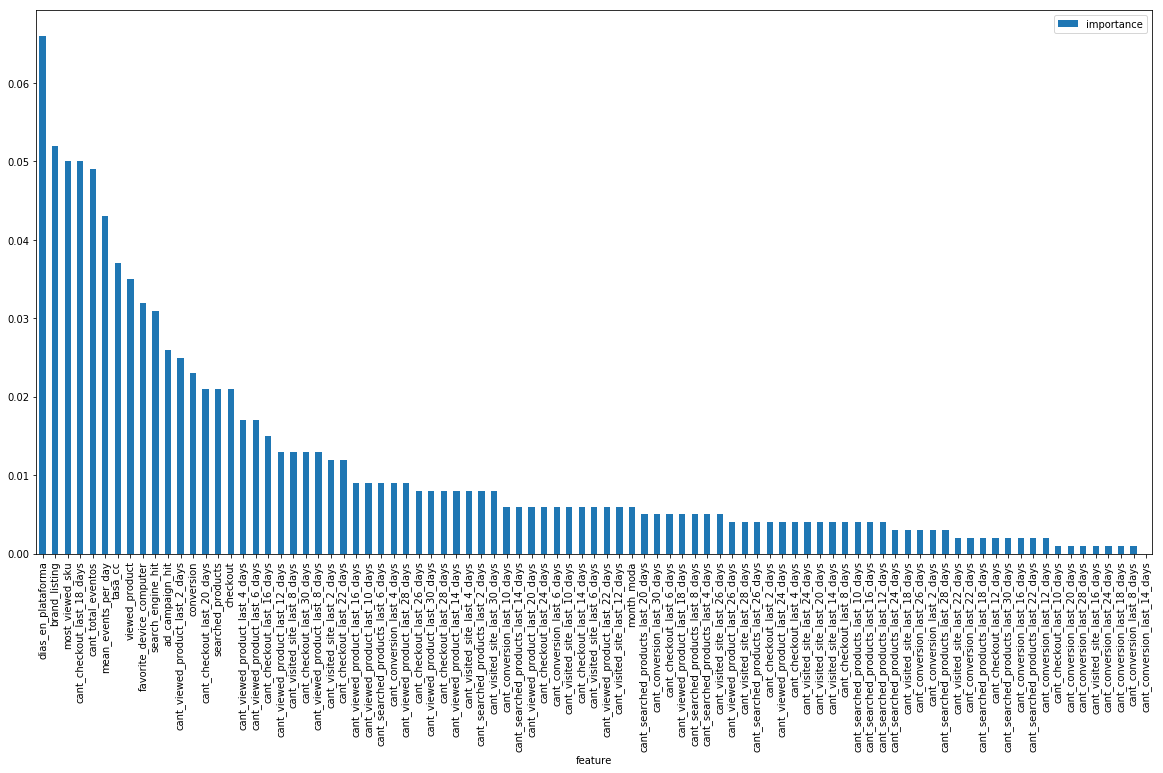

In [212]:
#ax =plot_importance(xgbf)
#fig = ax.figure
#fig.set_size_inches(10, 10)

importances = pd.DataFrame({'feature':features_names,'importance':np.round(xgbf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar(figsize=(20,10))

In [213]:
xgbf.fit(x,y, eval_metric='aucpr')
pred = (xgbf.predict_proba(z)[:,1])

In [214]:
z.shape

(19415, 89)

In [215]:
# Tomo las personas que tengo que predecir
persons = test_set['person']

# Les agrego los labels que predije
submit = pd.DataFrame({'label': pred, 'person': persons})

# Creo Data Frame de sumit
submit = submit[['person', 'label']]

# Envío a archivo csv
submit.to_csv('../submits/xgboost_gaby.csv', index=False)

# Cuento cantidad de conversiones
no_conversiones = submit.loc[submit['label'] < 0.5]['label'].count()
print('Cantidad de no conversiones: ' + str(no_conversiones))

conversiones = submit.loc[submit['label'] >= 0.5]['label'].count()
print('Cantidad de conversiones: ' + str(conversiones))

Cantidad de no conversiones: 15760
Cantidad de conversiones: 3655


### submit.shape